# PROGRAMMIERÜBUNG: ÜBERLEBEN AUF DER TITANIC

<font size="3">In unserer Programmierübung werden wir uns heute einem historischen Klassifizierungsproblem widmen. Am 14. April 1912 kollidierte die Titanic, das bis dato größte Passagierschiff der Welt, mit einem Eisberg und sank. Die Mehrzahl der Passagiere hat die Tragödie nicht überlebt. Was aber unterscheidet Passagiere, die überlebten von Passagieren, die mit dem Schiff untergingen? Wir wollen heute ein Modell entwickeln, das das Überleben von Titanic-Passagieren aufgrund verschiedener Personenmerkmale vorhersagt. Los geht's!</font>

In [1]:
import warnings
warnings.filterwarnings("ignore")

## 1 // LOAD THE DATA

<font size="3">**Aufgabe 1**:\
Lade die Daten titanic.csv von github herunter und speichere sie an einem Ort deiner Wahl. Lese die Datei in Python in ein pandas Dataframe ein.</font>

In [2]:
import pandas as pd

titanic = pd.read_csv('titanic_data/titanic.csv')

## 2 // DATA EXPLORATION & CLEANING

<font size="3">**Aufgabe 2**:\
Verschaffe dir einen Überblick über die Daten. Beantworte dafür folgende Fragen:
- Wie viele Datenpunkte befinden sich in unserem Datensatz?
- Wie heißen die Variablen (Spalten) in unserem Datensatz und was bedeuten sie?
- Welche Variablen beinhalten wie viele fehlende Werte?
- Welche Datentypen haben unsere Variablen? Machen die Datentypen Sinn?

Für mehr Infos über den Datensatz besuche: https://www.kaggle.com/c/titanic/data</font>

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f'Datenpunkte im Datensatz: {len(titanic)}')
print(f'\nVariablennamen: {list(titanic.columns)}')
print(f'\nFehlende Werte:')
print(titanic.isnull().sum())
print(f'\nDatentypen:')
print(titanic.dtypes)

Datenpunkte im Datensatz: 891

Variablennamen: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Fehlende Werte:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Datentypen:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<font size="3">**Aufgabe 3**:\
Ertstelle ein Balkendiagramm, das die Verteilung von Überlebenden und Nicht-Überlebenden beschreibt. Gib ihm einen Titel und beschrifte die Achsen.</font>

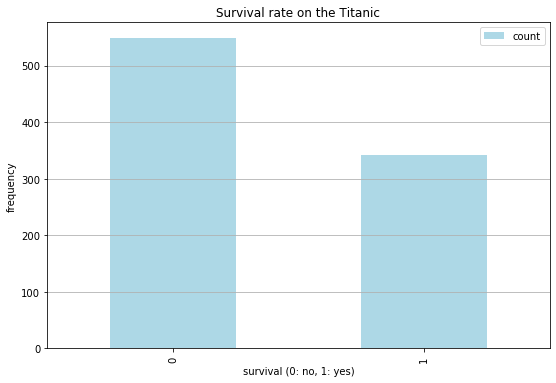

In [5]:
import matplotlib.pyplot as plt

survived = pd.DataFrame(titanic.Survived.value_counts()).reset_index().rename(
                        columns={'index': 'survived', 'Survived': 'count'})
survived.plot.bar(x='survived', y='count', color='lightblue', figsize=(9, 6))
plt.grid(axis='y')
plt.title("Survival rate on the Titanic")
plt.xlabel("survival (0: no, 1: yes)")
plt.ylabel("frequency")
plt.show()

<font size="3">**Aufgabe 4**:\
Verschaffe dir einen Überblick über die Zusammenhänge zwischen features (unabhängigen Variablen) und vorherzusagender Variable ("Survived"). Erstelle dazu folgende Schaubilder:
- ein Balkendiagramm, das die Variable "Survived" getrennt nach Geschlecht abbildet
- ein Balkendiagramm, das die Variable "Survived" getrennt nach Ticketklassen abbildet
- zwei Histogramme, die die Altersverteilung von Personen darstellen, die überlebt und nicht-überlebt haben
- ein Balkendiagramm, das die Variable "Survived" getrennt nach zugestiegenem Hafen abbildet

Gib deinen Plots wie immer eine Überschrift und Achsenbeschriftungen.</font>

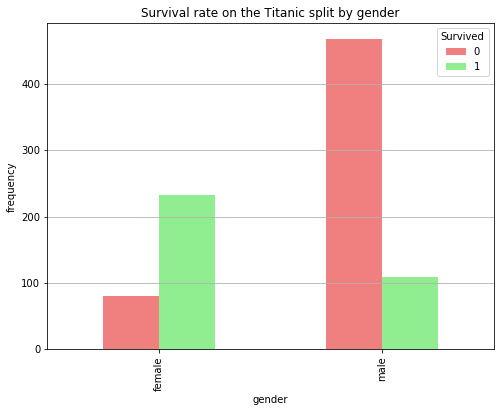

In [6]:
pd.crosstab(titanic['Sex'],titanic['Survived']).plot(kind="bar", figsize=(8,6), color=['lightcoral', 'lightgreen'])
plt.grid(axis='y')
plt.title("Survival rate on the Titanic split by gender")
plt.xlabel("gender")
plt.ylabel("frequency")
plt.show()

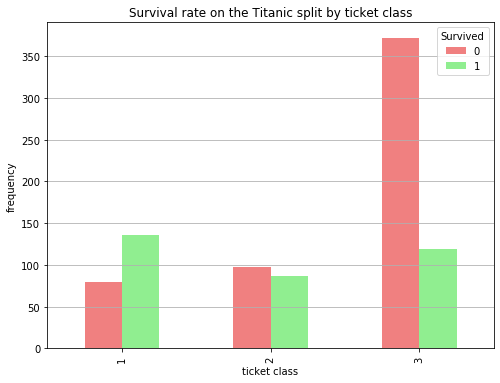

In [7]:
pd.crosstab(titanic['Pclass'],titanic['Survived']).plot(kind="bar", figsize=(8,6), color=['lightcoral', 'lightgreen'])
plt.grid(axis='y')
plt.title("Survival rate on the Titanic split by ticket class")
plt.xlabel("ticket class")
plt.ylabel("frequency")
plt.show()

Text(0.5, 0, 'age')

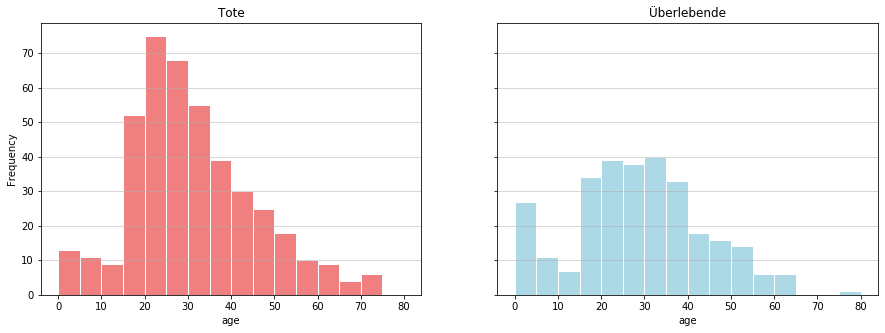

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
titanic[titanic['Survived']==0]['Age'].plot.hist(ax=ax[0], bins=list(range(0, 81, 5)),
                                                 edgecolor='white', color='lightcoral')
titanic[titanic['Survived']==1]['Age'].plot.hist(ax=ax[1], bins=list(range(0, 81, 5)),
                                                 edgecolor='white', color='lightblue')
ax[0].grid(axis='y', linewidth=0.5)
ax[1].grid(axis='y', linewidth=0.5)
ax[0].set_title('Tote')
ax[1].set_title('Überlebende')
ax[0].set_xlabel('age')
ax[1].set_xlabel('age')

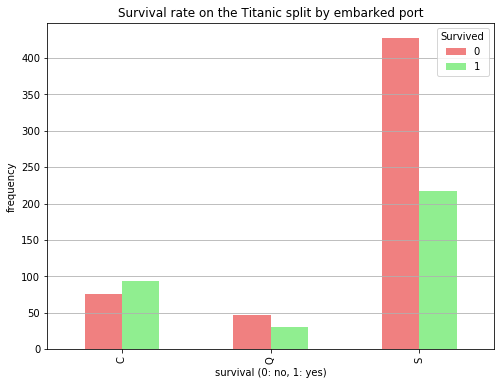

In [9]:
pd.crosstab(titanic['Embarked'], titanic['Survived']).plot(kind="bar", figsize=(8,6), color=['lightcoral', 'lightgreen'])
plt.grid(axis='y')
plt.title("Survival rate on the Titanic split by embarked port")
plt.xlabel("survival (0: no, 1: yes)")
plt.ylabel("frequency")
plt.show()

### MISSING VALUE IMPUTATION

<font size="3">**Aufgabe 5:**\
Unser feature Alter hat eine Menge fehlender Werte. Wir können versuchen, die fehlenden Werte zu ersetzen. Eine Möglichkeit wäre, einfach den Mittelwert zu nehmen. Eine bessere Idee könnte sein, die Anrede aus dem Namen der Passagiere zu isolieren, für jede Klasse von Anreden einen eigenen Mittelwert zu bilden und diesen dann - je nach Anrede - für die fehlenden Werte einzusetzen. Tätige dazu folgende Schritte:
- Bilde eine neue Splate im Dataframe namens 'Initial'.
- Durchsuche für jeden Datenpunkt den Namen und extrahiere die Anrede mit einer regular expression.<sup>1</sup>
- Speichere die extrahierte Anrede in der neuen Spalte 'Initial'.
- Untersuche welche Anreden in der neuen Spalte Initial vertreten sind.
- Alle Anreden außer Mr, Miss, Mrs & Master sind für uns uninteressant. Ersetze diese Anreden durch "other".
- Berechne die Mittelwerte in jeder Klasse von Anreden. Runde auf.
- Ersetze fehlende Werte in der Age Spalte durch die berechneten Mittelwerte.

<sup>1</sup> Hinweis: Du kannst die pandas Funktion Series.str.extract() verwenden. Eine adäquate regular expression ist '([A-Za-z]+)\.'. Die regular expression findet alle Zeichenfolgen im Namen gefolgt von einem Punkt. Übergebe der Funktion die regular expression als Parameter.

In [10]:
titanic['Initial'] = titanic.Name.str.extract('([A-Za-z]+)\.')

In [11]:
titanic.Initial.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Mme           1
Don           1
Ms            1
Countess      1
Capt          1
Jonkheer      1
Lady          1
Name: Initial, dtype: int64

In [12]:
for passenger in range(len(titanic)):
    if titanic['Initial'].iloc[passenger] not in ['Mr', 'Miss', 'Mrs', 'Master']:
        titanic['Initial'].iloc[passenger] = 'other'

In [13]:
titanic.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.773973
Mr        32.368090
Mrs       35.898148
other     42.384615
Name: Age, dtype: float64

In [14]:
for initial, age in zip(['Mr', 'Miss', 'Mrs', 'Master', 'other'], [33, 22, 36, 5, 43]):
    titanic.loc[(titanic.Age.isnull()) & (titanic.Initial==initial), 'Age'] = age

### FEATURE ENGINEERING

<font size="3">**Aufgabe 6:**\
Wir wollen einige der feature transformieren. Vor allem Klassifizierungsalgorithmen können schlecht mit metrischen unabhängigen Variablen umgehen.
- Erstelle ein neues binäres feature 'Alone' aus den features 'SibSp' und 'Parch', das abbildet, ob eine Person alleine oder mit Familienmitgliedern gereist ist. (Welche Werte müssen 'SibSp' und 'Parch' annehmen, dass 'Alone' zutrifft?)
- Erstelle ein Schaubild, das die Überlebensrate unter Alleinreisenden vs. Reisenden mit Familie abbildet.<sup>2</sup>
- Transformiere das Alter in eine neue kategoriale Variable 'Age_cat' mit den Klassen 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 70+.
- Transformiere die Kosten des Tickets ('Fare') in eine neue kategoriale Variable 'Fare_cat' mit 5 gleich großen Klassen.<sup>3</sup>

<sup>2</sup> Hinweis: Schaue dir das seaborn package mit der Funktion factorplot an.\
<sup>3</sup> Hinweis: Du kannst die pandas Funktion qcut verwenden.</font>

In [15]:
alone = []
for passenger in range(len(titanic)):
    if titanic['SibSp'].iloc[passenger] == 0 and titanic['Parch'].iloc[passenger] == 0:
        alone.append(1)
    else:
        alone.append(0)
titanic['Alone'] = alone

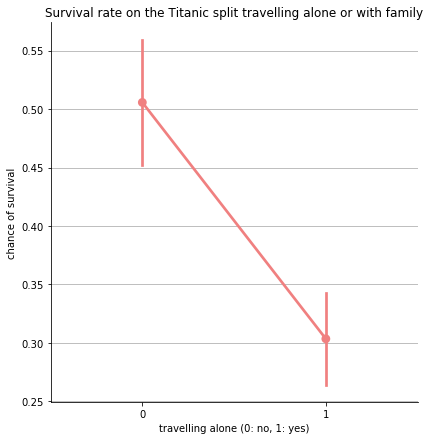

In [16]:
import seaborn as sns

sns.factorplot('Alone','Survived',data=titanic, size=6, color='lightcoral')
plt.grid(axis='y')
plt.title("Survival rate on the Titanic split travelling alone or with family")
plt.xlabel("travelling alone (0: no, 1: yes)")
plt.ylabel("chance of survival")
plt.show()

In [17]:
age_cat = []
for passenger in range(len(titanic)):
    if titanic.Age.iloc[passenger] <= 10:
        age_cat.append(0)
    if titanic.Age.iloc[passenger] > 10 and titanic.Age.iloc[passenger] <= 20:
        age_cat.append(1)
    if titanic.Age.iloc[passenger] > 20 and titanic.Age.iloc[passenger] <= 30:
        age_cat.append(2)
    if titanic.Age.iloc[passenger] > 30 and titanic.Age.iloc[passenger] <= 40:
        age_cat.append(3)
    if titanic.Age.iloc[passenger] > 40 and titanic.Age.iloc[passenger] <= 50:
        age_cat.append(4)
    if titanic.Age.iloc[passenger] > 50 and titanic.Age.iloc[passenger] <= 60:
        age_cat.append(5)
    if titanic.Age.iloc[passenger] > 60 and titanic.Age.iloc[passenger] <= 70:
        age_cat.append(6)
    if titanic.Age.iloc[passenger] > 70:
        age_cat.append(7)

titanic['Age_cat'] = age_cat

In [18]:
titanic['Fare_qcut']=pd.qcut(titanic['Fare'], 5)
titanic.Fare_qcut.value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare_qcut, dtype: int64

In [19]:
titanic['Fare_cat'] = 0

titanic.loc[titanic['Fare'] <= 7.9, 'Fare_cat'] = 0
titanic.loc[(titanic['Fare'] > 7.9) & (titanic['Fare'] <= 10.5), 'Fare_cat'] = 1
titanic.loc[(titanic['Fare'] > 10.5) & (titanic['Fare'] <= 21.7), 'Fare_cat'] = 2
titanic.loc[(titanic['Fare'] > 21.7) & (titanic['Fare'] <= 39.7), 'Fare_cat'] = 3
titanic.loc[(titanic['Fare'] > 39.7), 'Fare_cat'] = 4

<font size="3">**Aufgabe 7:**\
Damit unser Algorithmus unsere kategorialen Variablen später verarbeiten kann, konvertieren wir die mit strings kodierten Variablen noch in mit Zahlen kodierte Variablen: Bearbeite 'Sex', 'Embarked' und 'Initial' so, dass die Kategorien durch Zahlen repräsentiert werden.

Hinweis: Verwende die pandas Funktion replace.</font>

In [20]:
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
titanic['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'other'], [0, 1, 2, 3, 4], inplace=True)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Alone,Age_cat,Fare_qcut,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,0,2,"(-0.001, 7.854]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0,3,"(39.688, 512.329]",4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2,1,2,"(7.854, 10.5]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0,3,"(39.688, 512.329]",4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1,3,"(7.854, 10.5]",1


<font size="3">**Aufgabe 8:**\
Bevor wir mit der Modellanpassung starten, eliminieren wir noch feature, die wir ausschließlich als Hilfsfeature erstellt haben oder die von unserem Algorithmus später nicht verarbeitet werden können: Schließe die feature 'PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Fare_qcut' aus dem Dataframe aus.</font>

In [22]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Fare_qcut'])

<font size="3">Führe noch folgende Zelle aus, um die zwei Zeilen mit NaN Werten in 'Embarked' auszuschließen. (Die logistische Regression oder der Random Forest Classifier werfen sonst einen Fehler.)</font>

In [23]:
titanic = titanic.dropna()

### DATA PREPARATION: TRAIN-TEST SPLIT

<font size="3">**Aufgabe 9:**\
Teile den Datensatz in train (60%), validation (20%) und test (20%) Datensatz auf. Verwende dazu zwei mal die sklearn Funktion train_test_split: Teile zuerst in train und test im Verhältnis 80 zu 20. Teile das so erhaltene train dann noch einmal in train und validation im Verhältnis 75 zu 25. Setze den Parameter random_state, um das Ergebnis reproduzierbar zu machen.</font>

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic.drop(columns=['Survived']), titanic.Survived,
                                                    test_size=0.2, random_state=15)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=15)

## 3 + 4 // MODEL SELECTION & EVALUATION

<font size="3">**Aufgabe 10:**\
Passe eine logistische Regression auf die Daten an. Wir wollen diese später mit einem Random Forest Classifier vergleichen. Evaluiere die Leistung des Models mit dem test Datensatz hinsichtlich seiner Genauigkeit ("Accuracy"). Erstelle ein Schaubild, das die Confusion Matrix zeigt. Sagt das Modell mehr falsch Positive oder falsch Negative voraus?

Hinweis: Du kannst die Klasse LogisticRegression von sklearn benutzen. Du musst keine Parameter setzen, wenn du das Modell initialisierst. Sklearn stellt außerdem im Modul metrics die Funktionen accuracy_score und confusion_matrix zur Verfügung.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)
print('The accuracy of the Logistic Regression is', accuracy_score(pred, y_test))

The accuracy of the Logistic Regression is 0.8089887640449438


Text(33.0, 0.5, 'True label')

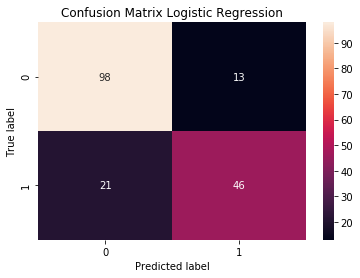

In [26]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='2.0f')
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')

<font size="3">**Aufgabe11:**\
Passe einen Random Forest Classifier (ohne Parameter) auf die Daten an und evaluiere seinen accuracy score auf dem test Datensatz.</font>

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print('The accuracy of the Random Forest Classifier is', accuracy_score(pred, y_test))

The accuracy of the Random Forest Classifier is 0.848314606741573


## 5 + 6 // FINE TUNING & PREDICTION

<font size="3">**Aufgabe 12:**\
Passe die Hyperparameter deines Random Forest mit einer Random Grid Search an. Verwende das vorgegebene Parameter-Grid. (Oder probiere ein eigenes aus?)
</font>

In [28]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(100, 1001, 100))
max_features = [0.5, 'auto', 'sqrt', 'log2']
min_samples_leaf = list(range(2, 21, 2))
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf}
print(param_grid)

forest = RandomForestClassifier()

grid_search = GridSearchCV(estimator=forest,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': [0.5, 'auto', 'sqrt', 'log2'], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  8.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

<font size="3">Rufe die besten Parameter für den Random Forest Classfier ab, die dir deine Grid Search zurückgibt. Berechne außerdem die accurary für das beste Modell aus der Grid Search.

Hinweis: Sklearn's GridSearchCV Klasse speichert das beste Modell. Es kann über das Attribut best_estimator_ abgerufen werden.</font>

In [29]:
print(grid_search.best_params_)
print(grid_search.best_estimator_.score(X_test, y_test))

{'max_features': 0.5, 'min_samples_leaf': 4, 'n_estimators': 1000}
0.8370786516853933


<font size="3">Stelle eine Confusion Matrix für den Random Forest Classifier auf? Sagt der Random Forest mehr falsch Positive oder falsch Negative voraus? Wie ist seine Leistung im Gegensatz zur logistischen Regression?</font>

Text(33.0, 0.5, 'True label')

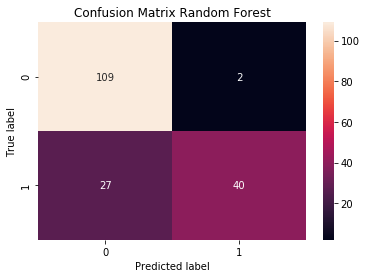

In [30]:
sns.heatmap(confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test)), annot=True, fmt='2.0f')
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted label')
plt.ylabel('True label')

### Herzlichen Glückwunsch! :)

<font size="3">Wenn du es bis zu diesem Punkt geschafft hast, hast du einen Datensatz geladen, ihn analysiert und gereinigt. Schaubilder erstellt und feature engineering betrieben. Einen train-test-split durchgeführt, zwei verschiedene Modelle angepasst und diese verglichen. Way to go!</font>

<font size="3">Für weiterführende Informationen, Analysen und Modelle zum Titanic Datensatz empfehle ich:\
https://www.kaggle.com/ash316/eda-to-prediction-dietanic</font>